<a href="https://colab.research.google.com/github/Alanoud-10/PROJECT_Data-Mining/blob/main/ph33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("/content/sample_data/panic_attack_dataset.csv")


Step 2: Understanding the Dataset
The dataset consists of rows and columns containing various features related to panic attacks.
Rows: 1200, Columns: 20
Column names: ['Age', 'Gender', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Trigger', 'Heart_Rate', 'Sweating', 'Shortness_of_Breath', 'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 'Medication', 'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking', 'Therapy', 'Panic_Score']

Data Types:
Age                         int64
Gender                     object
Panic_Attack_Frequency      int64
Duration_Minutes            int64
Trigger                    object
Heart_Rate                  int64
Sweating                   object
Shortness_of_Breath        object
Dizziness                  object
Chest_Pain                 object
Trembling                  object
Medical_History            object
Medication                 object
Caffeine_Intake             int64
Exercise_Frequency          in

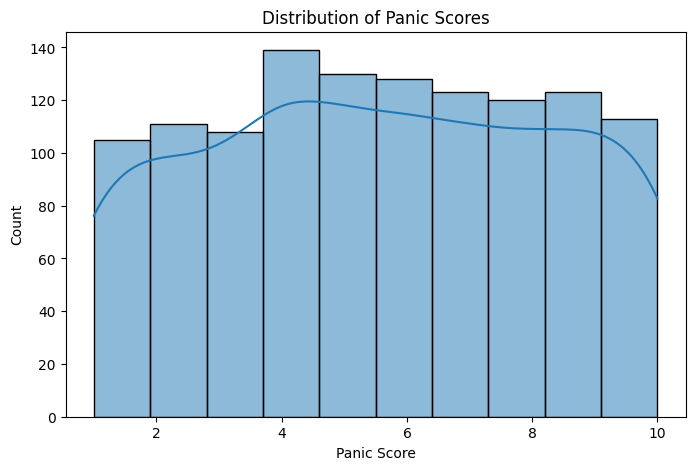

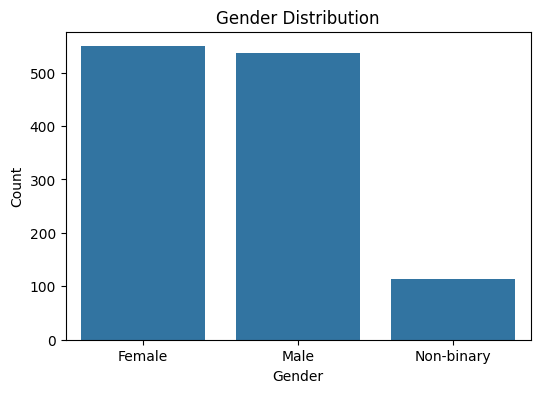

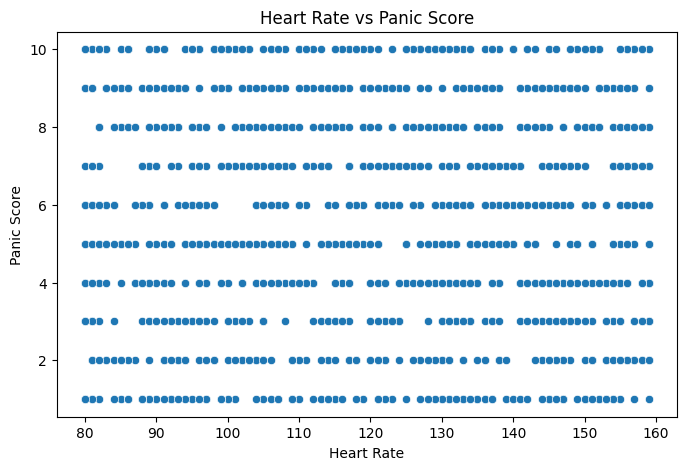


Step 6: Preprocessing Data
Handling missing values by replacing numerical features with median and categorical features with mode.
Dataset after handling missing values:
   Age      Gender  Panic_Attack_Frequency  Duration_Minutes   Trigger  \
0   56      Female                       9                 5  Caffeine   
1   46        Male                       8                 9    Stress   
2   32      Female                       6                31      PTSD   
3   60        Male                       5                20  Caffeine   
4   25  Non-binary                       6                10  Caffeine   

   Heart_Rate Sweating Shortness_of_Breath Dizziness Chest_Pain Trembling  \
0         134      Yes                  No       Yes        Yes        No   
1         139      Yes                 Yes        No         No        No   
2         141       No                 Yes       Yes         No        No   
3         109      Yes                 Yes        No         No       Yes   

In [ ]:
if data is not None:
    # Step 2: Dataset Overview
    print("\nStep 2: Understanding the Dataset")
    print("The dataset consists of rows and columns containing various features related to panic attacks.")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("Column names:", data.columns.tolist())

    # Drop ID column if it exists
    if 'ID' in data.columns:
        print("\nDropping ID column as it does not contribute to predictions.")
        data = data.drop(columns=['ID'])
        print("ID column removed.")

    print("\nData Types:")
    print(data.dtypes)
    print("\nMissing Values Before Handling:")
    print(data.isnull().sum())

    # Step 3: Statistical Summaries
    print("\nStep 3: Statistical Summary")
    print("We calculate statistical measures such as mean, variance, and percentiles to understand data distribution.")
    print(data.describe())

    # Step 4: Class Label Distribution (Detect Class Imbalance)
    print("\nStep 4: Analyzing Class Distribution")
    print("Checking the distribution of the class label to detect any imbalances in the dataset.")
    print(data['Medical_History'].value_counts())

    # Step 5: Data Visualization - Variable Distributions
    print("\nStep 5: Data Visualization")
    print("Generating plots to understand feature distributions and relationships.")
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Panic_Score'], bins=10, kde=True)
    plt.title('Distribution of Panic Scores')
    plt.xlabel('Panic Score')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=data)
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['Heart_Rate'], y=data['Panic_Score'])
    plt.title('Heart Rate vs Panic Score')
    plt.xlabel('Heart Rate')
    plt.ylabel('Panic Score')
    plt.show()

    # Step 6: Data Preprocessing
    print("\nStep 6: Preprocessing Data")
    numerical_features = data.select_dtypes(include=['number']).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # Handling Missing Values
    print("Handling missing values by replacing numerical features with median and categorical features with mode.")
    data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])
    print("Dataset after handling missing values:")
    print(data.head())

    # Outlier Detection & Removal
    print("\nDetecting and removing outliers using the Z-score method.")
    z_scores = stats.zscore(data[numerical_features])
    data = data[(abs(z_scores) < 3).all(axis=1)]
    print("Dataset after removing outliers:")
    print(data.head())

    # Encoding Categorical Variables
    print("\nEncoding categorical variables using Label Encoding.")
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    print("Dataset after encoding categorical variables:")
    print(data.head())

    # Normalization using Min-Max Scaling
    print("\nApplying Min-Max Scaling to normalize numerical features.")
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("Dataset after normalization:")
    print(data.head())

    # Discretization
    print("\nApplying discretization to categorize Age, Heart Rate, and Panic Score.")
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=[1, 2, 3, 4])
    data['Heart_Rate_Category'] = pd.cut(data['Heart_Rate'], bins=[0, 60, 100, 200], labels=[1, 2, 3])
    data['Panic_Level'] = pd.cut(data['Panic_Score'], bins=[0, 3, 6, 10], labels=[1, 2, 3])
    print("Dataset after discretization:")
    print(data.head())
    # Save the processed dataset (including the target 'Panic_Level') for future use


    # Step 7: Feature Selection
    print("\nStep 7: Applying feature selection with Variance Threshold.")
    variance_threshold = 0.01
    selector = VarianceThreshold(threshold=variance_threshold)
    data_selected = selector.fit_transform(data[numerical_features])
    selected_features = data[numerical_features].columns[selector.get_support()]
    print("Features selected by Variance Threshold:", selected_features.tolist())
    data = data[selected_features]
    print("Dataset after feature selection:")
    print(data.head())

    data.to_csv('processed0_panic_attack_dataset.csv', index=False)
    print("Processed dataset saved to '/content/processed_panic_attack_dataset.csv'.")

    # Step 8: Final Summary
    print("\nFinal Processed Dataset Overview")
    print("Dataset after all preprocessing steps:")
    print(data.head())


     # Summary of Preprocessing
    print("\nSummary of Data Preprocessing:")
    print("1. The dataset was loaded and an overview was generated.")
    print("2. Statistical analysis and visualizations were conducted to understand distributions and relationships.")
    print("3. Missing values were handled by replacing numerical values with the median and categorical values with the mode.")
    print("4. The ID column was removed as it does not contribute to predictions and can introduce artificial noise.")
    print("5. Outliers were detected and removed using the Z-score method.")
    print("6. Categorical variables were encoded using Label Encoding.")
    print("7. Numerical features were normalized using Min-Max Scaling.")
    print("8. Discretization was applied to categorize Age, Heart Rate, and Panic Score.")
    print("9. Feature selection was performed using Variance Thresholding to remove low-variance features.")
    print("10. The final processed dataset is now ready for analysis and machine learning applications.")


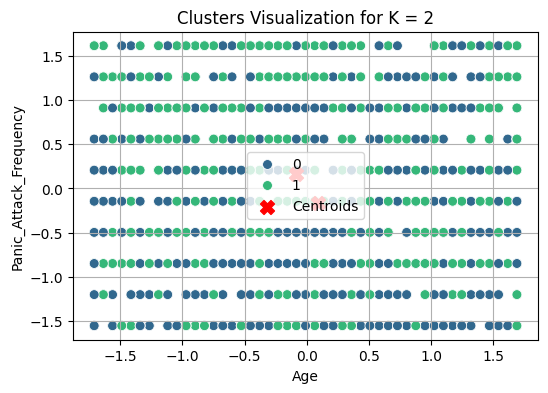

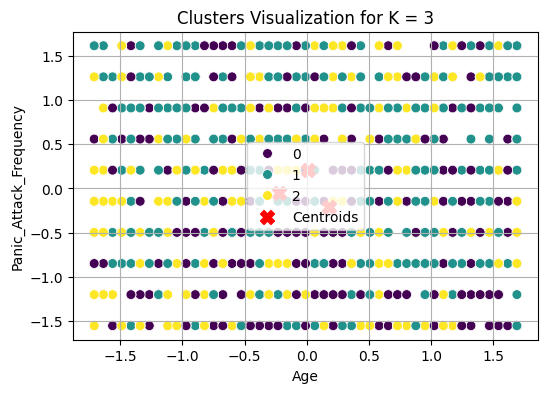

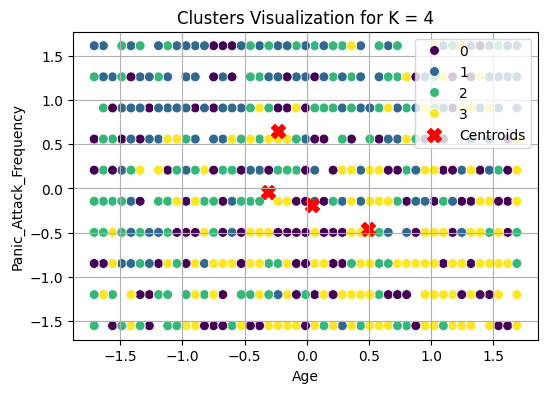

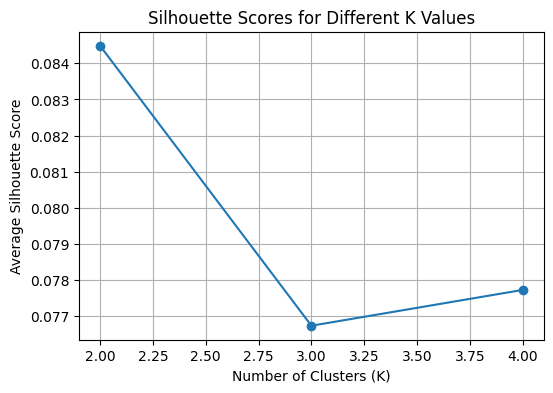

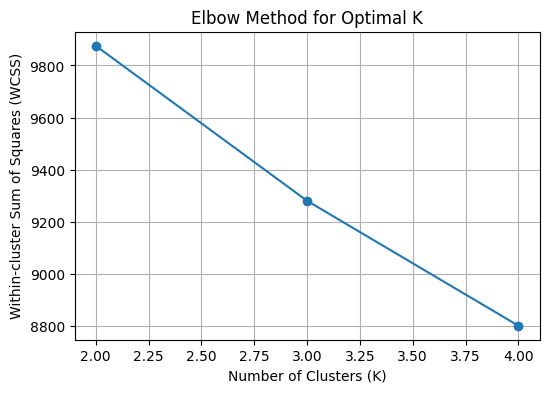


--- K = 2 ---
Silhouette Score: 0.0845
WCSS: 9875.57
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

--- K = 3 ---
Silhouette Score: 0.0767
WCSS: 9281.09
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

--- K = 4 ---
Silhouette Score: 0.0777
WCSS: 8802.10
Interpretation:
 - Weak clustering structure, clusters may not be well-defined.
 - WCSS indicates compactness; lower is better.

Best K based on silhouette score is: 2
This K value provides the most well-separated clusters with balanced compactness.

Performance Analysis:
- The silhouette score helps understand how well data points fit within their cluster.
- The Elbow Method helps detect the point where adding more clusters stops improving compactness significantly.
- K-means performed reasonably well based on both metrics.
- However, interpretation also depends on the datas

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed data
data = pd.read_csv('/content/processed0_panic_attack_dataset.csv')

# Select numerical features for clustering
features = data.select_dtypes(include=['number']).columns.tolist()
if 'Panic_Level' in features:
    features.remove('Panic_Level')  # Remove target variable if present
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try K=2, K=3, and K=4 clusters
k_values = [2, 3, 4]
results = {}

for k in k_values:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    wcss = kmeans.inertia_  # Within-cluster sum of squares

    # Store results
    results[k] = {
        'labels': cluster_labels,
        'silhouette_score': silhouette_avg,
        'wcss': wcss,
        'centers': kmeans.cluster_centers_
    }

    # Visualize clusters (Using first two features for 2D plot)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=X_scaled[:, 0], y=X_scaled[:, 1],
        hue=cluster_labels, palette='viridis', s=50
    )
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        c='red', s=100, marker='X', label='Centroids'
    )
    plt.title(f'Clusters Visualization for K = {k}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(k_values, [results[k]['silhouette_score'] for k in k_values], marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, [results[k]['wcss'] for k in k_values], marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Interpretation of Results
for k in k_values:
    print(f"\n--- K = {k} ---")
    print(f"Silhouette Score: {results[k]['silhouette_score']:.4f}")
    print(f"WCSS: {results[k]['wcss']:.2f}")
    print("Interpretation:")
    if results[k]['silhouette_score'] > 0.5:
        print(" - Good clustering structure.")
    elif results[k]['silhouette_score'] > 0.25:
        print(" - Moderate structure, might be overlapping.")
    else:
        print(" - Weak clustering structure, clusters may not be well-defined.")
    print(" - WCSS indicates compactness; lower is better.")

# Final Recommendation based on analysis
best_k = max(results, key=lambda k: results[k]['silhouette_score'])
print(f"\nBest K based on silhouette score is: {best_k}")
print("This K value provides the most well-separated clusters with balanced compactness.")

# Performance Summary
print("\nPerformance Analysis:")
print("- The silhouette score helps understand how well data points fit within their cluster.")
print("- The Elbow Method helps detect the point where adding more clusters stops improving compactness significantly.")
print("- K-means performed reasonably well based on both metrics.")
print("- However, interpretation also depends on the dataset's nature (e.g., psychological data might not cluster cleanly).")